In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cofactor.features import Features
from cofactor.model import LatticePredictor
from cofactor.calculator import CofactorCalculator

In [3]:
featgen = Features.from_excel('data/elemental.xlsx')
model = LatticePredictor.from_file('models/model.pkl')
data = pd.read_csv('data/lattices.csv', index_col=0)

In [52]:
temperatures = [25]

x_cerium = np.linspace(0.12, 0.15, 40).reshape(-1, 1)
inputs = {'Ce': x_cerium, 'Zr': 1 - x_cerium, 'T': 25}

X = featgen.get_features(inputs, model.features)

In [66]:
example_eddie = np.array([
    [11.393534002229654, 470.7213578500707],
    [12.508361204013376, 348.5148514851487],
    [12.909698996655514, 300.9900990099011],
    [13.444816053511701, 178.78359264497885],
    [13.846153846153847, 20.367751060820638],
])

cofactors_eddie = np.array([
    [12.497816164285508, 0.9977867711289287],
    [13.000483412177577, 0.9981617632840819],
    [13.498258868069184, 0.9990191227680352]
])

In [59]:
inputs = {
    'Ce': example_eddie[:, 0].reshape(-1, 1) / 100,
    'Zr': 1 - example_eddie[:, 0].reshape(-1, 1) / 100,
    'T': example_eddie[:, 1].reshape(-1, 1)
}
X = featgen.get_features(inputs, model.features)

In [61]:
cofactors = []
for tetr, mono in model.predict_lattice(X[model.features]):
    calc = CofactorCalculator(tetr, mono)
    cofactors.append(calc.get_cofactors())

In [62]:
results = pd.concat([X, pd.DataFrame(cofactors)], axis=1)

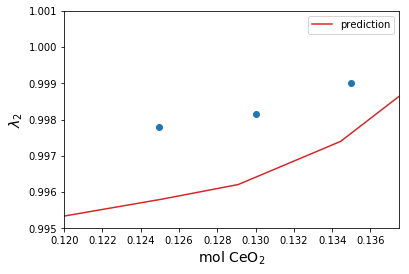

In [89]:
fig, ax = plt.subplots(figsize=(6, 4))

results.plot(x='Ce', y='B', ax=ax, color='#d62728', label='prediction')
ax.scatter(cofactors_eddie[:, 0] / 100, cofactors_eddie[:, 1], marker='o', label='Eddie')

ax.set_ylim(0.995, 1.001)
ax.set_xlim(0.12, 0.1375)
# ax.get_legend().remove()

ax.set_ylabel(r'$\lambda_2$', fontsize=14)
ax.set_xlabel(r'mol CeO$_2$', fontsize=14)

plt.show()

### Titanium

In [98]:
temperatures, Ti = np.meshgrid(
    np.linspace(300, 1200, 100),
    np.linspace(0, 0.15, 30)
)

inputs = {
    'Ti': Ti.reshape(-1, 1),
    'Zr': 1 - Ti.reshape(-1, 1),
    'T': temperatures.reshape(-1, 1)
}
X = featgen.get_features(inputs, model.features)

In [100]:
cofactors = []
for tetr, mono in model.predict_lattice(X[model.features]):
    calc = CofactorCalculator(tetr, mono)
    cofactors.append(calc.get_cofactors())

In [101]:
results = pd.concat([X, pd.DataFrame(cofactors)], axis=1)

In [109]:
B = results['B'].values.reshape(30, 100)

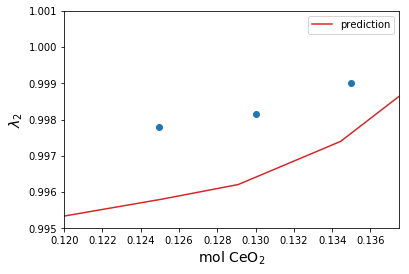

In [89]:
fig, ax = plt.subplots(figsize=(6, 4))

results.plot(x='Ce', y='B', ax=ax, color='#d62728', label='prediction')
ax.scatter(cofactors_eddie[:, 0] / 100, cofactors_eddie[:, 1], marker='o', label='Eddie')

ax.set_ylim(0.995, 1.001)
ax.set_xlim(0.12, 0.1375)
# ax.get_legend().remove()

ax.set_ylabel(r'$\lambda_2$', fontsize=14)
ax.set_xlabel(r'mol CeO$_2$', fontsize=14)

plt.show()

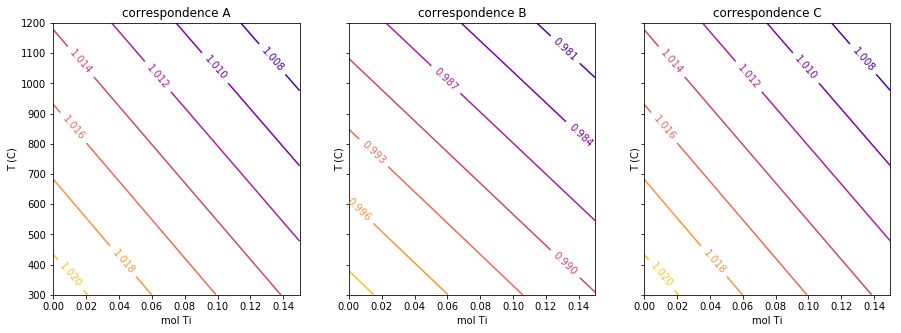

In [114]:
fig, ax_fig = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, label in zip(ax_fig, ['A', 'B', 'C']):
    CS = ax.contour(
        results[label].values.reshape(30, 100),
        extent=(results['Ti'].min(), results['Ti'].max(), results['T'].min(), results['T'].max()),
        cmap='plasma'
    )

    ax.clabel(CS, CS.levels, inline=True, fontsize=10)

    ax.set_xlabel('mol Ti')
    ax.set_ylabel('T (C)')
    ax.set_title('correspondence %s' % label)
                       
plt.show()

### All elements in features

In [129]:
def gen_features(element, model):
    temperatures, fraction = np.meshgrid(
        np.linspace(300, 1200, 100),
        np.linspace(0, 0.15, 30)
    )

    inputs = {
        element: fraction.reshape(-1, 1),
        'Zr': 1 - fraction.reshape(-1, 1),
        'T': temperatures.reshape(-1, 1)
    }
    X = featgen.get_features(inputs, model.features)
    
    return X

def calc_cofactors(X, model):
    cofactors = []
    for tetr, mono in model.predict_lattice(X[model.features]):
        calc = CofactorCalculator(tetr, mono)
        cofactors.append(calc.get_cofactors())
    
    results = pd.concat([X, pd.DataFrame(cofactors)], axis=1)
    
    return results

def plot_contours(element, results, ax_fig):
#     fig, ax_fig = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    for ax, label in zip(ax_fig, ['A', 'B', 'C']):
        CS = ax.contour(
            results[label].values.reshape(30, 100),
            extent=(results[element].min(), results[element].max(), results['T'].min(), results['T'].max()),
            cmap='plasma'
        )

        ax.clabel(CS, CS.levels, inline=True, fontsize=10)

        ax.set_xlabel('mol %s' % element)
        ax.set_ylabel('T (C)')
        ax.set_title('correspondence %s' % label)

#     plt.show()

/miniconda3/envs/dskoda/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/miniconda3/envs/dskoda/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/miniconda3/envs/dskoda/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reinde

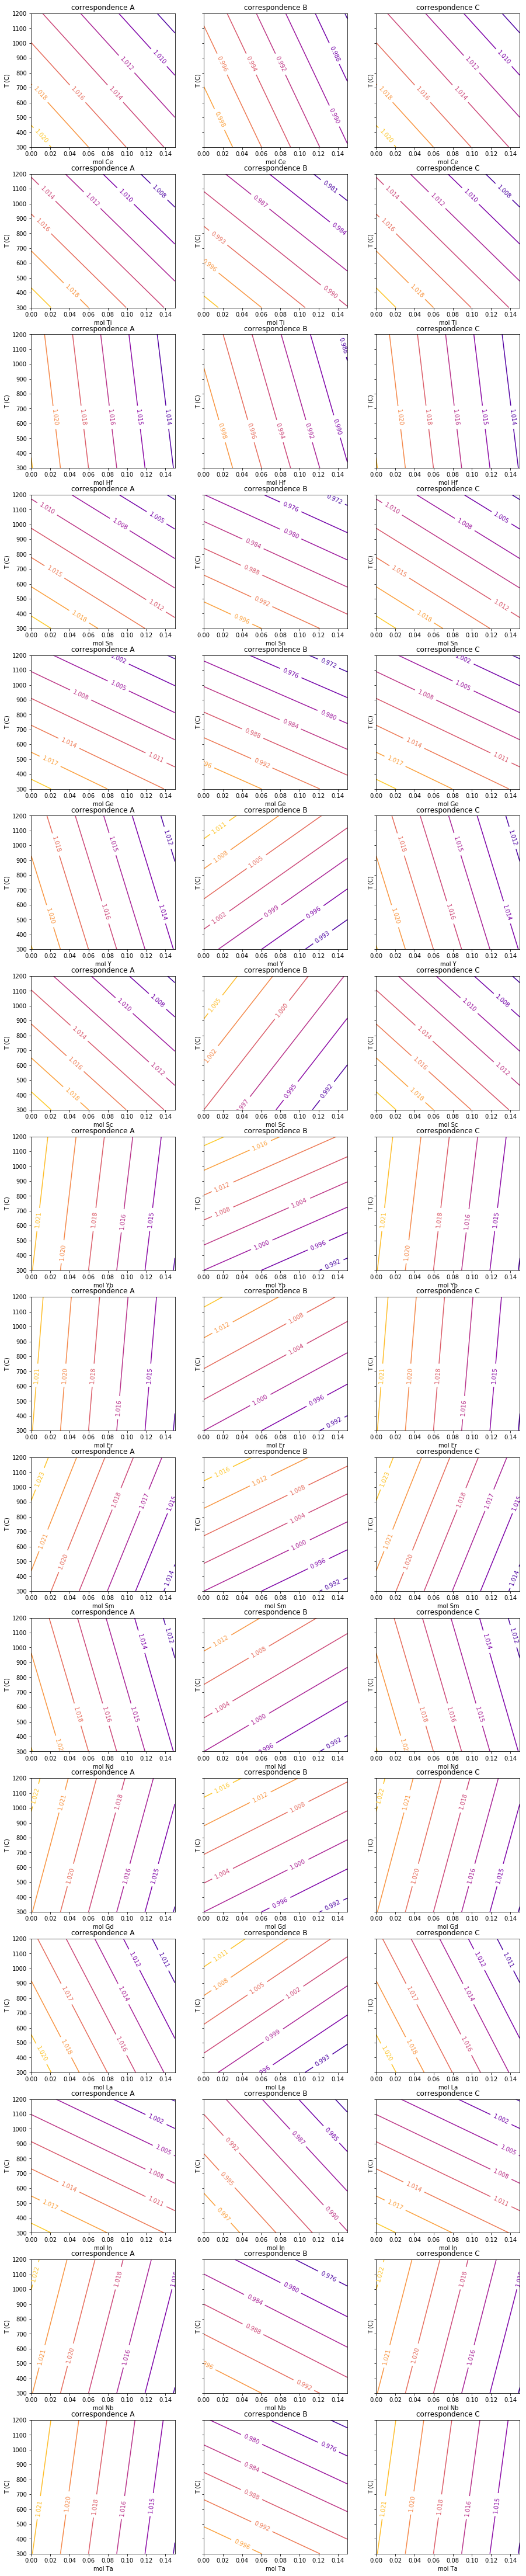

In [130]:
N = len(featgen.atomic_feat.index) - 1
fig, ax_fig = plt.subplots(N, 3, figsize=(15, 5 * N), sharey=True)

for idx, element in enumerate(featgen.atomic_feat.index):
    if element == 'Zr':
        continue
    
    X = gen_features(element, model)
    results = calc_cofactors(X, model)

    plot_contours(element, results, ax_fig[idx])

In [131]:
fig.savefig('cofactors.pdf')